Please upload your image file (e.g., lena.png):


Saving Lena.png to Lena.png


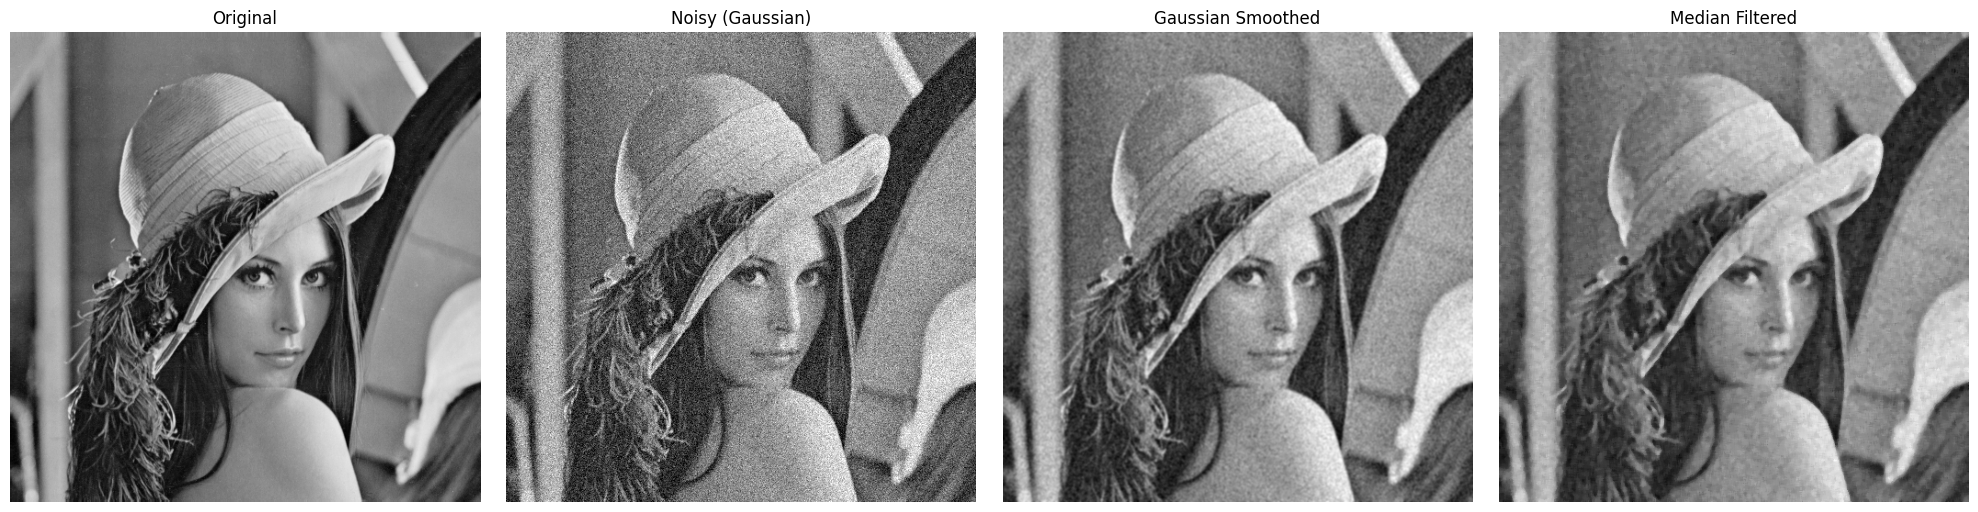

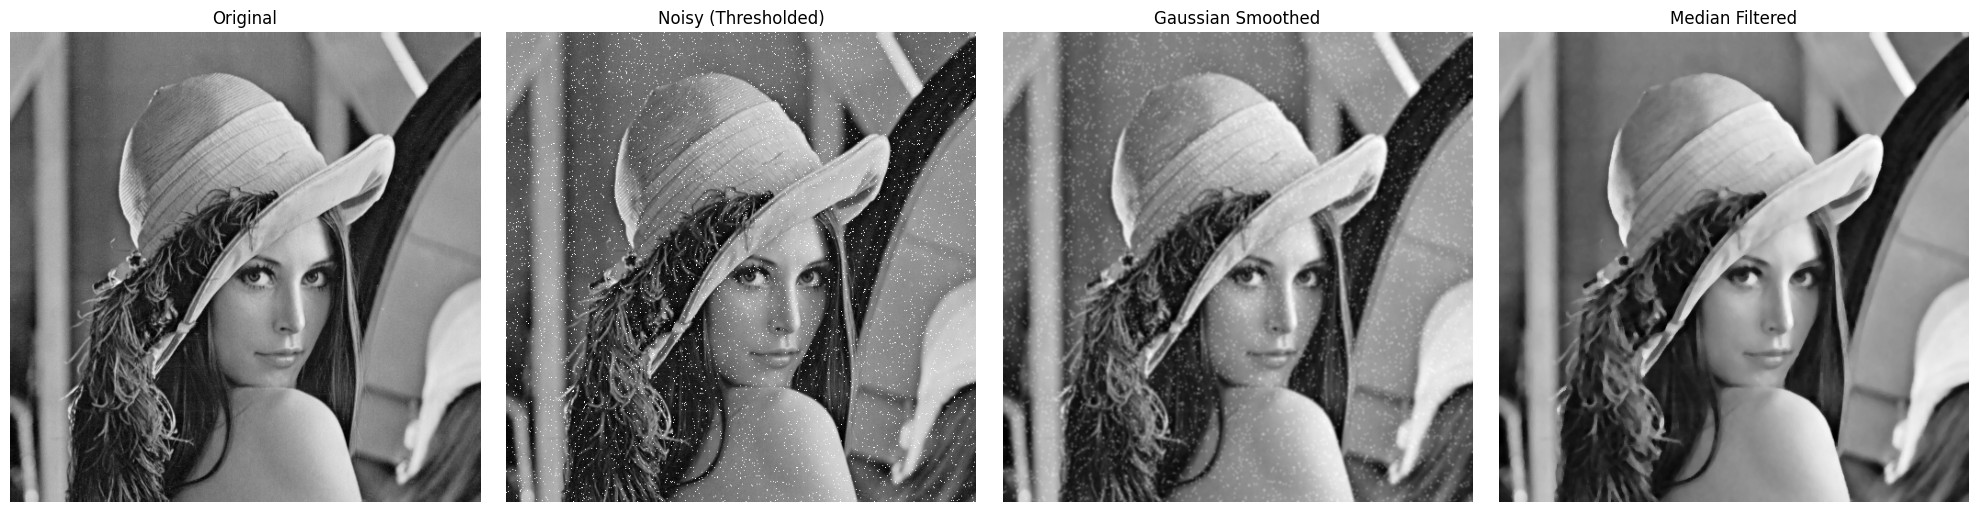

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO

def upload_and_load_image():
    uploaded = files.upload()
    file_name = next(iter(uploaded))
    img = Image.open(BytesIO(uploaded[file_name])).convert('L')
    return np.array(img).astype(float) / 255.0

def add_gaussian_noise(img, mean=0, std=0.1):
    noise = np.random.normal(mean, std, img.shape)
    noisy_img = img + noise
    return np.clip(noisy_img, 0, 1)

def add_thresholded_noise(img, threshold=0.2):
    noise = np.random.normal(0, 0.1, img.shape)
    thresholded_noise = np.where(noise > threshold, 1, 0)
    noisy_img = img + thresholded_noise
    return np.clip(noisy_img, 0, 1)

def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1/ (2*np.pi*sigma**2)) *
                     np.exp(-((x-(size-1)/2)**2 + (y-(size-1)/2)**2) / (2*sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

def myGaussianSmoothing(I, k, s):
    kernel = gaussian_kernel(k, s)
    pad = k // 2
    padded_img = np.pad(I, ((pad, pad), (pad, pad)), mode='edge')
    smoothed = np.zeros_like(I)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            smoothed[i, j] = np.sum(padded_img[i:i+k, j:j+k] * kernel)
    return smoothed

def myMedianFilter(I, k):
    pad = k // 2
    padded_img = np.pad(I, ((pad, pad), (pad, pad)), mode='edge')
    filtered = np.zeros_like(I)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            filtered[i, j] = np.median(padded_img[i:i+k, j:j+k])
    return filtered

def display_images(images, titles):
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=(5*n, 5))
    if n == 1:
        axes = [axes]
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

print("Please upload your image file:")
original = upload_and_load_image()

#adding gaussian noise
noisy_gaussian = add_gaussian_noise(original)

#applying gaussian smoothing and median filtering to noisy image
gaussian_smoothed = myGaussianSmoothing(noisy_gaussian, 5, 1)
median_filtered = myMedianFilter(noisy_gaussian, 5)

display_images([original, noisy_gaussian, gaussian_smoothed, median_filtered],
               ['Original', 'Noisy (Gaussian)', 'Gaussian Smoothed', 'Median Filtered'])

#adding thresholded noise
noisy_thresholded = add_thresholded_noise(original)

#applying gaussian smoothing and median filtering to thresholded noisy image
gaussian_smoothed_thresh = myGaussianSmoothing(noisy_thresholded, 5, 1)
median_filtered_thresh = myMedianFilter(noisy_thresholded, 5)

display_images([original, noisy_thresholded, gaussian_smoothed_thresh, median_filtered_thresh],
               ['Original', 'Noisy (Thresholded)', 'Gaussian Smoothed', 'Median Filtered'])